## Setup

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the CSV file into a pandas DataFrame
#data = pd.concat([pd.read_csv('mutag_runs.csv').dropna(subset=['model']), pd.read_csv('runs.csv').dropna(subset=['model'])])
data = pd.read_csv('ptcmm_runs.csv').dropna(subset=['model'])
data = data[data['model'] != "gated_gnn"]

#data = data[np.isnan(data['num_layers'])]
#data = data[data['test_loss'] < 0.8]

In [ ]:
np.unique(data['num_layers'], return_counts=True)

(array([3]), array([569]))

In [ ]:
subgraphs = ["cycles", "paths", "y_shape", "nbhoods", "circular", "collective"]
chem_rules = ["hydrocarbons", "oxy", "nitro", "sulfuric", "relaxations"]


In [ ]:
import numpy as np
#sum(data['model'] == "kgnn")
#np.unique(data['y_shape'])
order = ["diffusion", "cw_net", "sgn", "ego", "kgnn", "kgnn_local", "rgcn", "gnn"]
print("\n\n".join([f"{model}:\n{data[data['model'] == model]['test_loss'].describe()}" for model in np.unique(data['model'])]))

cw_net:
count    68.000000
mean      0.428655
std       0.056556
min       0.306931
25%       0.393564
50%       0.425743
75%       0.465347
max       0.594059
Name: test_loss, dtype: float64

diffusion:
count    75.000000
mean      0.420858
std       0.051173
min       0.316832
25%       0.386139
50%       0.415842
75%       0.465347
max       0.544554
Name: test_loss, dtype: float64

ego:
count    38.000000
mean      0.408286
std       0.053514
min       0.267327
25%       0.376238
50%       0.410891
75%       0.445545
max       0.495050
Name: test_loss, dtype: float64

gnn:
count    100.000000
mean       0.417030
std        0.052604
min        0.277228
25%        0.376238
50%        0.420792
75%        0.455446
max        0.564356
Name: test_loss, dtype: float64

kgnn:
count    93.000000
mean      0.421271
std       0.056586
min       0.267327
25%       0.396040
50%       0.425743
75%       0.455446
max       0.603960
Name: test_loss, dtype: float64

kgnn_local:
count    26.000000
m

[Text(0, 0, 'diffusion'),
 Text(1, 0, 'cw_net'),
 Text(2, 0, 'sgn'),
 Text(3, 0, 'ego'),
 Text(4, 0, 'kgnn'),
 Text(5, 0, 'kgnn_local'),
 Text(6, 0, 'rgcn'),
 Text(7, 0, 'gnn')]

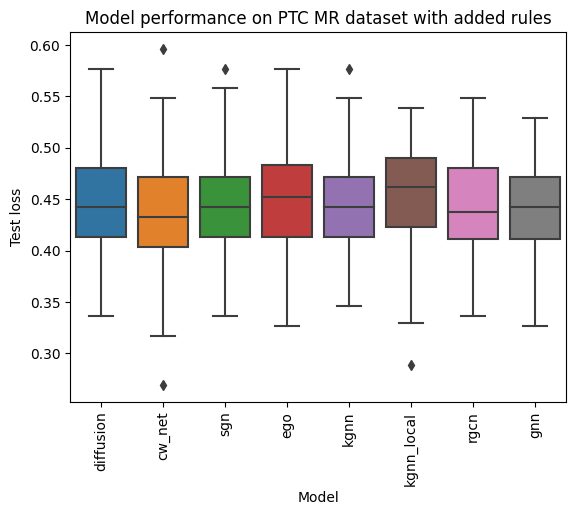

In [ ]:
ax = sns.boxplot(data, y="test_loss", x="model", order=order)
ax.set_xlabel("Model")
ax.set_ylabel("Test loss")
ax.set_title("Model performance on PTC MR dataset with added rules")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'diffusion'),
 Text(1, 0, 'cw_net'),
 Text(2, 0, 'sgn'),
 Text(3, 0, 'ego'),
 Text(4, 0, 'kgnn'),
 Text(5, 0, 'kgnn_local'),
 Text(6, 0, 'rgcn'),
 Text(7, 0, 'gnn')]

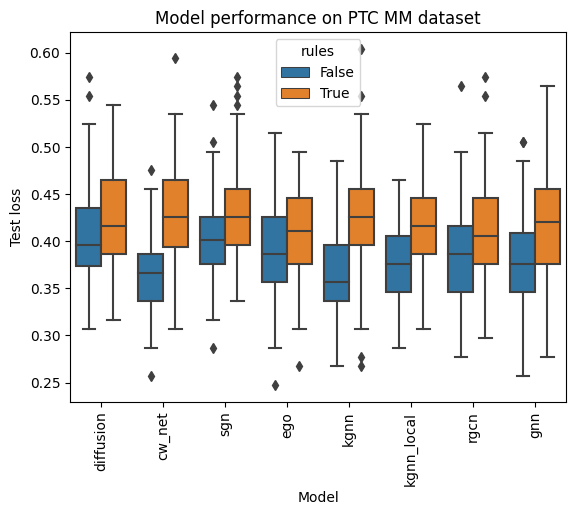

In [ ]:
# make a plot for each model, bare vs rule
data2 = pd.read_csv('ptcmm_runs_bare.csv').dropna(subset=['model'])
data2 = data2[data2['model'] != "gated_gnn"]
#data2 = data2[data2['test_loss'] < 0.8]
data2 = data2.assign(rules=False)

data1 = data.assign(rules=True)
data1 = pd.concat([data1, data2], axis=0)

ax = sns.boxplot(data1, y="test_loss", x="model", order=order, hue="rules")
ax.set_xlabel("Model")
ax.set_ylabel("Test loss")
ax.set_title("Model performance on PTC MM dataset")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [ ]:
# ptc: 
# layers 3
# max_depth sgn 2, cw 7, dif 3
# param_size 4
# cox:
# layers 2
# params 5
# dhfr:
# layers 5
# params 7
# er:
# layers 3
# params 3

data.columns

Index(['Start Time', 'Duration', 'Run ID', 'Name', 'Source Type',
       'Source Name', 'User', 'Status', 'chem_rules', 'dataset',
       'learning_rate', 'max_depth', 'model', 'num_layers', 'parameter_size',
       'subgraphs', 'test_loss', 'train_loss'],
      dtype='object')

<Axes: xlabel='parameter_size', ylabel='test_loss'>

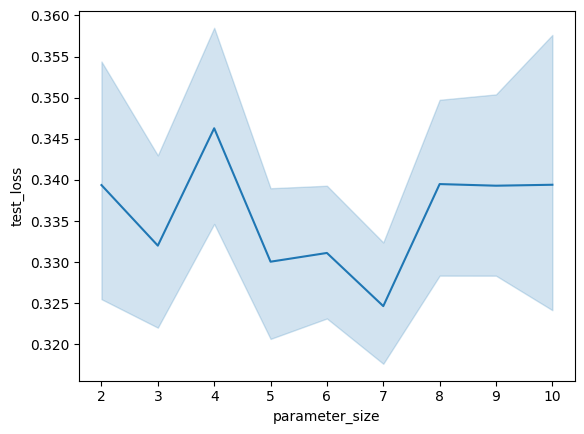

In [ ]:
sns.lineplot(data=data, x='parameter_size', y='test_loss')#, hue="model")

In [ ]:
sorted_data = data.sort_values('test_loss')[:100]
print("\n\n".join([f"{model}:\n{sorted_data[sorted_data['model'] == model]['test_loss'].describe()}" for model in np.unique(data['model'])]))
individual = {r:sum(sorted_data[r]) for r in chem_rules + subgraphs}
counts = sorted_data[chem_rules + subgraphs].apply(lambda x: tuple(x), axis=1).value_counts()
counts = dict(counts)

cw_net:
count    11.000000
mean      0.348335
std       0.018691
min       0.306931
25%       0.351485
50%       0.356436
75%       0.356436
max       0.366337
Name: test_loss, dtype: float64

diffusion:
count    13.000000
mean      0.348819
std       0.019450
min       0.316832
25%       0.336634
50%       0.356436
75%       0.366337
max       0.366337
Name: test_loss, dtype: float64

ego:
count    8.000000
mean     0.334158
std      0.032516
min      0.267327
25%      0.329208
50%      0.341584
75%      0.356436
max      0.366337
Name: test_loss, dtype: float64

gnn:
count    20.000000
mean      0.344554
std       0.024799
min       0.277228
25%       0.336634
50%       0.356436
75%       0.366337
max       0.366337
Name: test_loss, dtype: float64

kgnn:
count    13.000000
mean      0.330541
std       0.032472
min       0.267327
25%       0.316832
50%       0.336634
75%       0.356436
max       0.366337
Name: test_loss, dtype: float64

kgnn_local:
count    4.000000
mean     0.334158


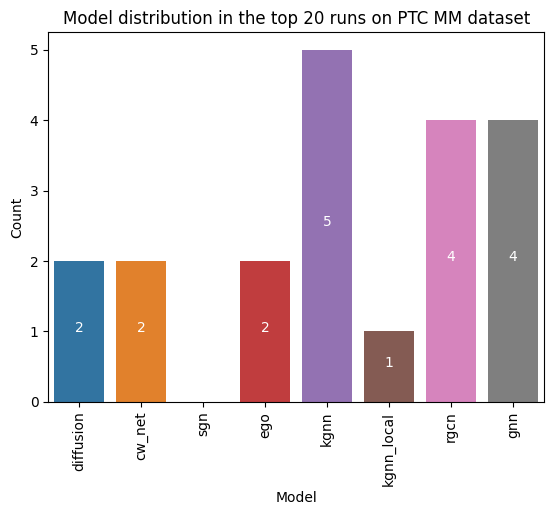

In [ ]:
from matplotlib.ticker import FuncFormatter
ax = sns.countplot(sorted_data[:20], x="model", order=order)
ax.set_xlabel("Model")
ax.set_ylabel("Count")
ax.set_title("Model distribution in the top 20 runs on PTC MM dataset")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
formatter = FuncFormatter(lambda y, _: '{:.0f}'.format(y))
plt.gca().yaxis.set_major_formatter(formatter)

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()
    ax.text(x+width/2, y+height/2, str(int(height)), ha="center", fontsize=10, color='white')
    


In [ ]:
chem_data = pd.melt(sorted_data[:20], id_vars=['Start Time', "test_loss", "train_loss", "model"], value_vars=chem_rules + subgraphs, var_name="variables")
chem_data = chem_data[chem_data['value'] == True].drop(columns=['value'])
ax = sns.countplot(chem_data, x="variables", order=chem_rules + subgraphs)
ax.set_xlabel("Rule")
ax.set_ylabel("Count")
ax.set_title("Rule distribution in the top 20 runs on PTC MM dataset")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
formatter = FuncFormatter(lambda y, _: '{:.0f}'.format(y))
plt.gca().yaxis.set_major_formatter(formatter)

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()
    ax.text(x+width/2, y+height/2, str(int(height)), ha="center", fontsize=10, color='white')

In [ ]:
sorted_data[chem_rules + subgraphs].apply(lambda x: tuple(x), axis=1)[:10].value_counts()

(False, False, True, False, False, False, True, False, True, True, True)      1
(False, False, False, True, True, False, False, True, False, False, True)     1
(False, False, True, True, False, True, True, False, True, True, False)       1
(True, True, True, False, False, False, True, True, True, False, True)        1
(False, True, True, False, False, True, False, True, False, True, False)      1
(False, True, True, True, False, True, False, True, True, True, False)        1
(True, True, True, False, False, False, False, False, False, False, False)    1
(True, False, False, True, False, True, False, True, True, False, False)      1
(False, False, False, False, False, True, False, True, True, True, True)      1
(False, True, True, False, True, False, False, True, False, True, False)      1
dtype: int64

[Text(0, 0, 'diffusion'),
 Text(1, 0, 'cw_net'),
 Text(2, 0, 'sgn'),
 Text(3, 0, 'ego'),
 Text(4, 0, 'kgnn'),
 Text(5, 0, 'kgnn_local'),
 Text(6, 0, 'rgcn'),
 Text(7, 0, 'gnn')]

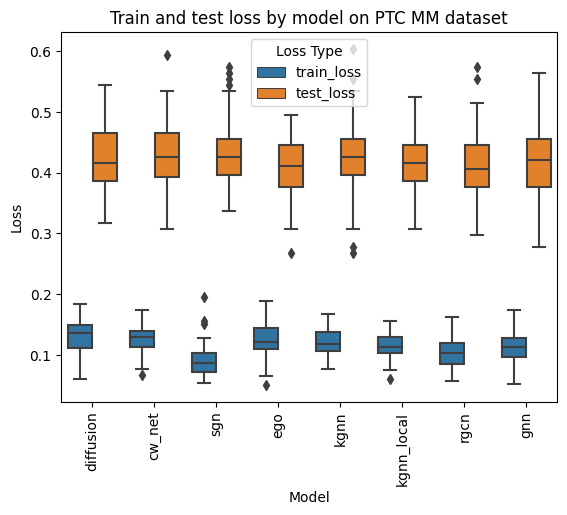

In [30]:
df_stacked = pd.melt(data, id_vars=['model'], value_vars=['train_loss', 'test_loss'],
                     var_name='Loss Type', value_name='Loss')

# Create the boxplot
ax = sns.boxplot(x='model', y='Loss', hue='Loss Type', data=df_stacked, order = order)

# Set the title and labels
plt.title('Train and test loss by model on PTC MM dataset')
plt.xlabel('Model')
plt.ylabel('Loss')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Text(0, 0.5, 'Generalization Error')

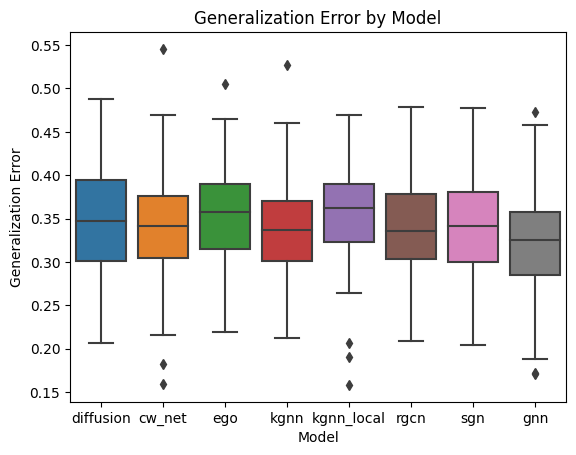

In [ ]:
data['Generalization Error'] = abs(data['train_loss'] - data['test_loss'])

# Create the boxplot
sns.boxplot(x='model', y='Generalization Error', data=data)

# Set the title and labels
plt.title('Generalization Error by Model')
plt.xlabel('Model')
plt.ylabel('Generalization Error')


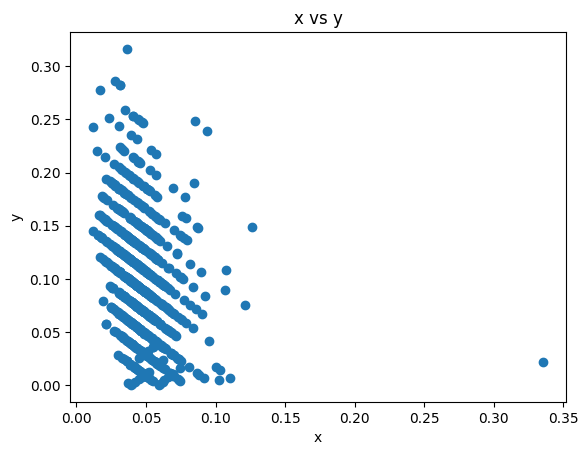

In [ ]:
# best split (0.73, 0.76)
# best epochs ~175
# best lr ~0.005
# best param_size = 3
# best layers ~3

# Extract the x and y columns from the DataFrame
x = data['train_loss']
y = data['Generalization Error']

# Plot x vs y
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')
plt.show()

## Dataset definition

In [ ]:
! pip install neuralogic
! pip install torch_geometric
from neuralogic.nn import get_evaluator
from neuralogic.core import R, Template, V, Transformation, Aggregation
from neuralogic.core.settings import Settings
from neuralogic.dataset import Dataset
from neuralogic.optim import SGD
from neuralogic.utils.data import Mutagenesis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 19.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 12.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910459 sha256=695657ee68c5c568c4e252535ae09c7163f54f3bf7c0d102aec513f297c2b6c5
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric


/usr/local/lib/python3.10/dist-packages/neuralogic/core/builder/builder.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
from torch_geometric.datasets import TUDataset
from neuralogic.dataset import TensorDataset, Data, FileDataset

ds = TUDataset(".", name="PTC_FM")

dataset = TensorDataset(data=[Data.from_pyg(data)[0] for data in ds], number_of_classes=2, 
                        one_hot_decode_edge_features=True, one_hot_decode_features=True,
                        feature_name="atom", edge_name="bond")

Extracting ./PTC_FM/PTC_FM.zip
Processing...
Done!


In [ ]:
dataset.dump_to_file("./ptcfm_queries.txt", "./examples.txt")

In [ ]:
with open("examples.txt") as f:
  lines = f.readlines()

In [ ]:
import re

new_lines = []
for line in lines:
  preds = [p.strip(" ,\n.") for p in line.split("<1>") if p.strip(" ,\n") != ""]
  bonds = [b for b in preds if "bond" in b]
  other = set(preds) - set(bonds)

  numbers = re.findall(r'\d+', line)

  c = max(map(int, numbers)) + 1

  new_line = []
  idx = {}
  for b in bonds:
    match = re.match(r"bond_(\d+)\((\d+), (\d+)\)", b)
    x = match.group(2)
    y = match.group(3)
    t = match.group(1)
    
    if (x, y) not in idx.keys() and (y, x) not in idx.keys():
      bond = f"{c}"
      idx[(x, y)] = bond
      idx[(y, x)] = bond
      c += 1
      new_line.append(f"<1> bond({x}, {y}, {bond}),<1> bond({y}, {x}, {bond}),<1> b_{t}({bond})")


  new_lines.append(", ".join(new_line) + ",<1> " + ",<1> ".join(other) + ".")

with open("ptcfm_examples.txt", "w") as f:
  f.writelines("\n".join(new_lines))

In [ ]:
dataset = FileDataset(examples_file="new_examples.txt", queries_file="queries.txt")

In [ ]:
from neuralogic.core import Template, R, V

template = Template()

atom_types = [f"atom_{i}" for i in range(18)]
key_atoms = ["atom_1", "atom_2", "atom_3", "atom_7"]
bond_types = ["b_1", "b_2", "b_3", "b_0"]

template.add_rules([
    (R.bond_embed(V.B)[3,] <= R.get(bond)(V.B)) for bond in bond_types
    ])

template.add_rules([
    (R.atom_embed(V.A)[3,] <= R.get(atom)(V.A)) for atom in atom_types
    ])

template +=  R.layer_1(V.X) <= (R.atom_embed(V.X)[3, 3], R.atom_embed(V.Y)[3, 3],
                                R.bond(V.X, V.Y, V.B), R.bond_embed(V.B))

template += R.predict[1, 3] <= R.layer_1(V.X)

In [ ]:
from neuralogic.core import Settings
from neuralogic.nn.loss import MSE
from neuralogic.nn import get_evaluator
from neuralogic.optim import Adam
import random
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt


settings = Settings(optimizer=Adam(lr=0.01), epochs=10, error_function=MSE())
evaluator = get_evaluator(template, settings)

built_dataset = evaluator.build_dataset(dataset)

## Training

In [ ]:
from neuralogic.core import Settings
from neuralogic.nn.loss import MSE
from neuralogic.nn import get_evaluator
from neuralogic.optim import Adam
import random
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

def train_test_cycle(template, dataset, lr=0.001, epochs=100, split=0.75):
  settings = Settings(optimizer=Adam(lr=lr), epochs=epochs, error_function=MSE())
  evaluator = get_evaluator(template, settings)

  built_dataset = evaluator.build_dataset(dataset)
  dataset_len = len(built_dataset.samples)

  train_size = int(dataset_len*split)

  idx = random.sample(list(range(dataset_len)), train_size)
  rest = list(set(range(dataset_len)) - set(idx))
  train_dataset = np.array(built_dataset.samples)[idx]
  test_dataset = np.array(built_dataset.samples)[rest]
  average_losses = []

  for current_total_loss, number_of_samples in evaluator.train(train_dataset):
      clear_output(wait=True)
      plt.ylabel("Loss")
      plt.xlabel("Epoch")

      plt.xlim(0, settings.epochs)
      
      train_loss = current_total_loss/number_of_samples
      print(train_loss)

      average_losses.append(train_loss)
      
      plt.plot(average_losses, label="Average loss")

      plt.legend()
      plt.pause(0.001)
      plt.show()

  loss = []
  for sample, y_hat in zip(test_dataset, evaluator.test(test_dataset, generator=False)):
      loss.append(round(y_hat) != sample.java_sample.target.value)

  test_loss = sum(loss) / len(test_dataset)

  return train_loss, test_loss, evaluator


0.2000807660103802


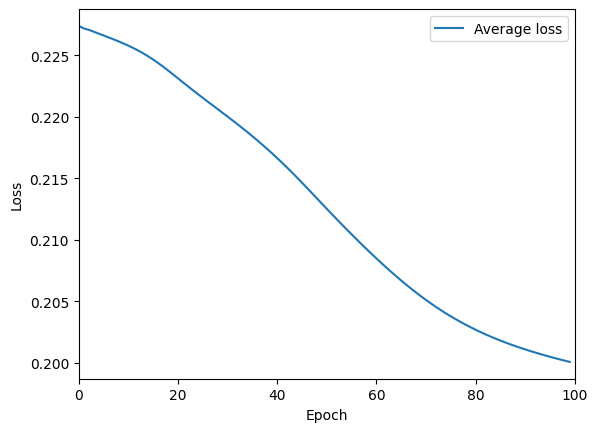

0.32954545454545453

In [ ]:
test_losses = []
for i in range(1):
  print("Training and testing model #{}".format(i))
  train_loss, test_loss, eval = train_test_cycle(template, dataset)
  test_losses.append(test_loss)

np.average(test_losses)